# Sentiment Analysis for Newspapers

## Motivation

In modern times the ambivalenve of media coverage becomes a rising problem. People are trusting the media less and less and the shere scale of available news reports makes it nowadays very hard to reflect all possible angles towards a topic. It becomes harder for people to detect biased reports and the pure existence of fraudelent or insufficient media coverage makes the entire media industry suspicious and vulnerable for wrong or right insults of sharing "fake news".

Recent studies have shown that 48% of american citizen have general distrust in the media as stated [by this website.](https://www.weforum.org/agenda/2018/07/chart-of-the-day-this-is-how-much-americans-distrust-the-media/) This might be true, however we could not be sure about this number until we checked how it came up or who states it. To check back if this number is correct, we'd have to invest a significant amount of time to find other sources validating this number. This work can become very cumbersum and impractical in day to day life. It is necessary to have trustworthy independent media coverage.

And this is where text mining tools could support the search for secondary sources by automatically detecting the topic of a newspaper article and compare it with articles of the same topic in different newspapers. This project aims to support the analysis of various newspapers and compare them with each other to give a notion how different newspapers cover the same topic.

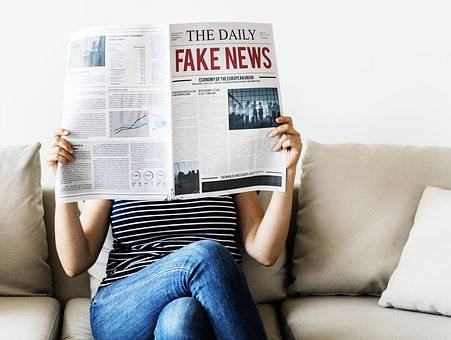 

## Goal

The goal of this project is to enrich the debate with a sentiment analysis of online representations of mainstream media sites. The focus of the analysis lays in the politics department of well known newspapers. The scrapped data of these newspapers are undertaken by a sentiment analysis to understand the content of each article and based on the results mapped against each other. Meaning each article, that corresponds to the same topic is matched between newspapers. The results are supposed to be analysed in summary statistics to get a notion on how different the coverage is on specific topics within the politics spectrum.

## Technical Approach

The underlying approach to reach the stated goal can be divided into 4 parts:

    1. Scrape the online data of the selected newspapers
    
    2. Sentiment Analysis of each article in the politics part
    
    3. Map articles, that cover the sme topic
    
    4. Provide summary statistics for the coverage of specific topics

## Proof of Concept for the Scraping of the media articles

The biggest issue for this project is the supply of clean data. In this section the proof of concept for the scrapping of the news data is presented utilizing the *newspaper* library.

In [26]:
%%capture #Supress output from installation
!pip install newspaper3k
!pip install TextBlob
import  nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [28]:
import newspaper #The newspaper library contains handy tools to download articles from newspapers
print("Popular topics: ")
[print(topic) for topic in newspaper.hot()[0:5]]
print("\nPopular Urls: ")
[print(topic) for topic in newspaper.popular_urls()[0:5]]
print("\n")

Popular topics: 
Boeing stock
Adnan Syed
Jaguar attack
Antonio Brown
Ethiopian Airline crash

Popular Urls: 
http://www.huffingtonpost.com
http://cnn.com
http://www.time.com
http://www.ted.com
http://pandodaily.com




Articles from a lot of *build-in* newspapers can be downloaded. The library also provides already popular topics. We will choose the CNN website as an example.

In [29]:
# Example newspaper of CNN
newspaper = newspaper.build('http://www.cnn.com')

For this newspaper the articles can be adressed and used for further analysis.

In [31]:
print("First 5 articles")
for article in newspaper.articles[0:5]:
    print(article.url)
print("\n",len(newspaper.articles)," articles were found")

First 5 articles
http://www.cnn.com/business/media
http://www.cnn.com/2017/03/04/vr/how-to-watch-vr
http://www.cnn.com/2019/01/15/vr/skiing-soelden-vr/index.html
http://www.cnn.com/2018/11/09/vr/wwi-anniversary-planes-vr/index.html
http://www.cnn.com/2018/11/01/vr/hogwarts-express-steam-train-vr/index.html

 898  articles were found


... and furthermore specific categories can be taken. The project focuses on the politics category.

In [32]:
print("Example of the categories found:")
for category in newspaper.category_urls()[0:5]:
    print(category)

Example of the categories found:
http://www.cnn.com
http://www.cnn.com/vr
http://www.cnn.com/world
http://www.cnn.com/travel
http://www.cnn.com/europe


### Example of the first article found

In [39]:
# First download html of the article
article = newspaper.articles[2]
article.download()
# Parse the html of the article
article.parse()

The articles are easily structured for authors, title and content.

In [40]:
print("Article Authors:")
print(article.authors)
print("\nArticle Title:")
print(article.title)
print("\nArticle Content:")
print(article.text)

Article Authors:
[]

Article Title:
Ski at Austria's Soelden resort

Article Content:
Soelden, Austria (CNN) Take to the slopes and experience the thrill of some of the highest skiing in Europe. With breathtaking vistas and nearly 90 miles of trails, there's no question why skiing's World Cup takes place here every year.


Apply nlp to the article to find the summary and keywords on it and keep going with the technical approach.

In [42]:
article.nlp()

In [43]:
print(article.summary)
print(article.keywords)


Soelden, Austria (CNN) Take to the slopes and experience the thrill of some of the highest skiing in Europe.
With breathtaking vistas and nearly 90 miles of trails, there's no question why skiing's World Cup takes place here every year.
['trails', 'austrias', 'resort', 'soelden', 'world', 'skiings', 'ski', 'vistas', 'slopes', 'skiing', 'theres', 'thrill', 'takes']


In [44]:
from textblob import TextBlob
import time 

text = TextBlob(article.text)
print(article.text)
print(text.sentiment)
print("---------------------------------------------------------------------------------------------------")



Soelden, Austria (CNN) Take to the slopes and experience the thrill of some of the highest skiing in Europe. With breathtaking vistas and nearly 90 miles of trails, there's no question why skiing's World Cup takes place here every year.
Sentiment(polarity=0.55, subjectivity=0.7)
---------------------------------------------------------------------------------------------------
